We'll use the dataset available at https://www.kaggle.com/austinreese/craigslist-carstrucks-data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Initial data preparation

In [2]:
df = pd.read_csv('vehicles.csv')
df.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [3]:
col_names = pd.DataFrame(df.columns)
col_names

,0
0,id
1,url
2,region
3,region_url
4,price
5,year
6,manufacturer
7,model
8,condition
9,cylinders


In [4]:
df.drop(columns=['url', 'region_url', 'image_url', 'description', 'county'], inplace=True)

# Vehicles for sale by vehicles type

In [5]:
types_count = df.groupby('type')['id'].nunique()
types_count

type
SUV            77284
bus              517
convertible     7731
coupe          19204
hatchback      16598
mini-van        4825
offroad          609
other          22110
pickup         43510
sedan          87056
truck          35279
van             8548
wagon          10751
Name: id, dtype: int64

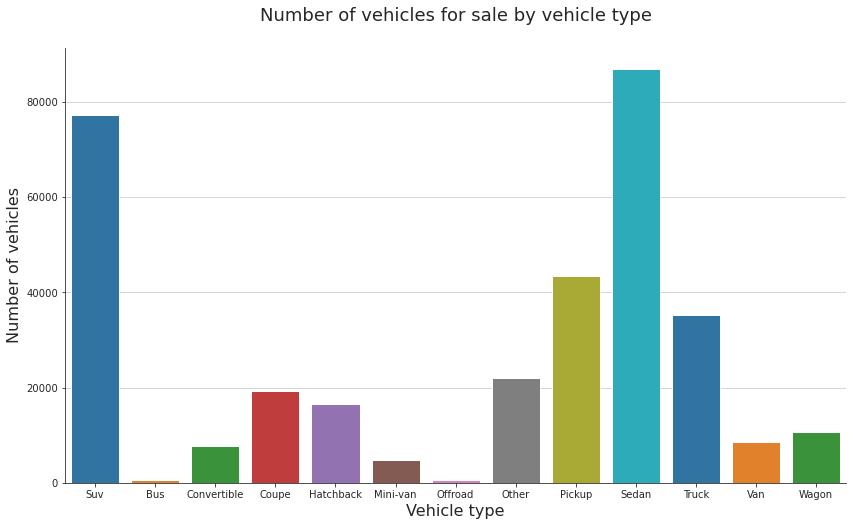

In [6]:
# Plot
indexes = [i.capitalize() for i in types_count.index]
fig = plt.figure(figsize=(14,8))

sns.set_style('ticks')
plt.grid(True)

sns.barplot(x=indexes, y=types_count.values, palette=sns.color_palette('tab10'))
sns.despine()

plt.title('Number of vehicles for sale by vehicle type\n', fontdict={'fontsize': 18})
plt.xlabel('Vehicle type', fontdict={'fontsize': 16})
plt.ylabel('Number of vehicles', fontdict={'fontsize': 16})

plt.show()

# Boxplot of vehicle types prices

Let's remove the outliers

In [7]:
q1, q3 = np.percentile(df.price, [25, 75])
iqr = q3 - q1  # Interquartile range

max_value = q3 + 1.5 * iqr
max_value

57364.375

In [8]:
# Filter the prices that are smaller than the max_value
# This way, we remove the high outliers

plot_df = df[df.price <= max_value].dropna(subset=['type'])
plot_df['type'] = plot_df.type.str.capitalize()
plot_df.head(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,transmission,VIN,drive,size,type,paint_color,state,lat,long,posting_date
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,...,other,3GTP1VEC4EG551563,NaN,NaN,Pickup,white,al,32.590,-85.4800,2021-05-04T12:31:18-0500
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,...,other,1GCSCSE06AZ123805,NaN,NaN,Pickup,blue,al,32.590,-85.4800,2021-05-04T12:31:08-0500
29,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,...,other,3GCPWCED5LG130317,NaN,NaN,Pickup,red,al,32.590,-85.4800,2021-05-04T12:31:25-0500
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,...,other,5TFRM5F17HX120972,NaN,NaN,Pickup,red,al,32.590,-85.4800,2021-05-04T10:41:31-0500
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,...,automatic,NaN,rwd,full-size,Truck,black,al,32.592,-85.5189,2021-05-03T14:02:03-0500


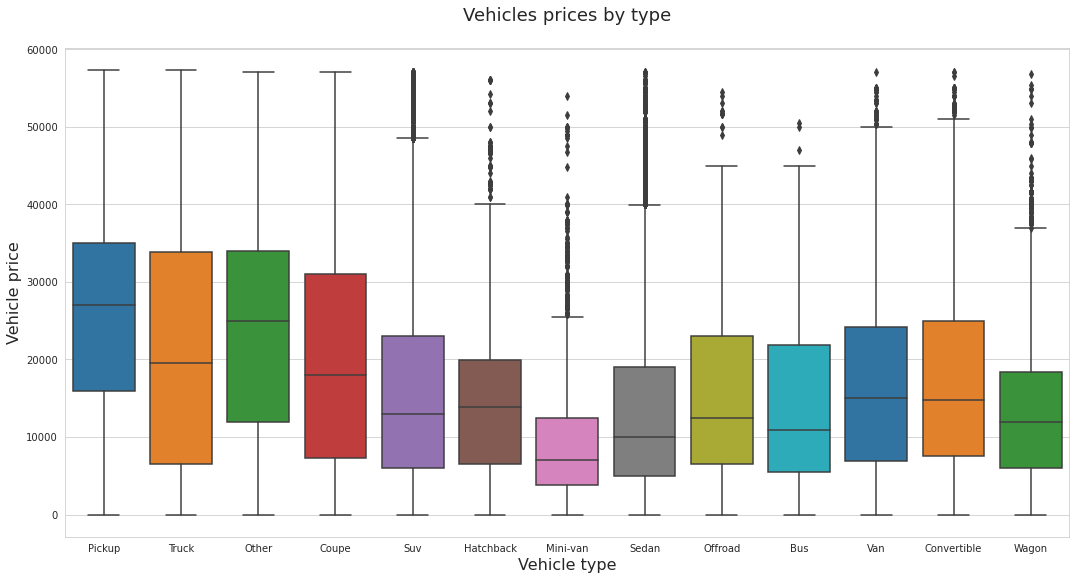

In [9]:
# Plot
plt.figure(figsize=(18, 9))

sns.set_style('whitegrid')
sns.boxplot(x='type', y='price', data=plot_df, palette=sns.color_palette('tab10'))

plt.title('Vehicles prices by type\n', fontdict={'fontsize': 18})
plt.xlabel('Vehicle type', fontdict={'fontsize': 16})
plt.ylabel('Vehicle price', fontdict={'fontsize': 16})

plt.show()

# Vehicle distribution by year

<Figure size 1152x576 with 0 Axes>

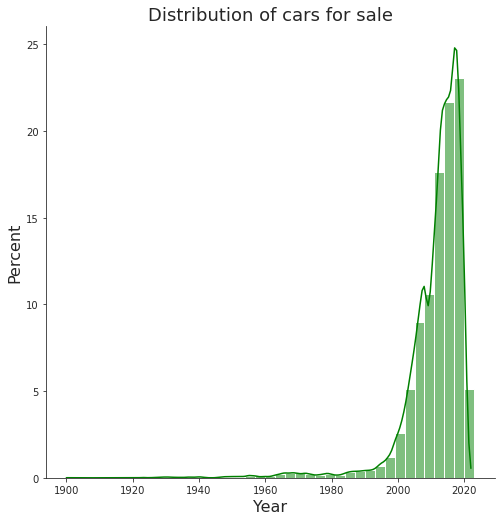

In [10]:
# Plot
plt.figure(figsize=(16, 8))

sns.set_style('ticks')
sns.displot(df, x='year', binwidth=3, height=7, stat='percent', color='green', kde=True)

plt.title('Distribution of cars for sale', fontdict={'fontsize': 18})
plt.xlabel('Year', fontdict={'fontsize': 16})
plt.ylabel('Percent', fontdict={'fontsize': 16})

plt.show()

# Number of vehicles by brand

In [11]:
brand_count = df.groupby('manufacturer')['id'].nunique().sort_values(ascending=False)
brand_count

manufacturer
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin

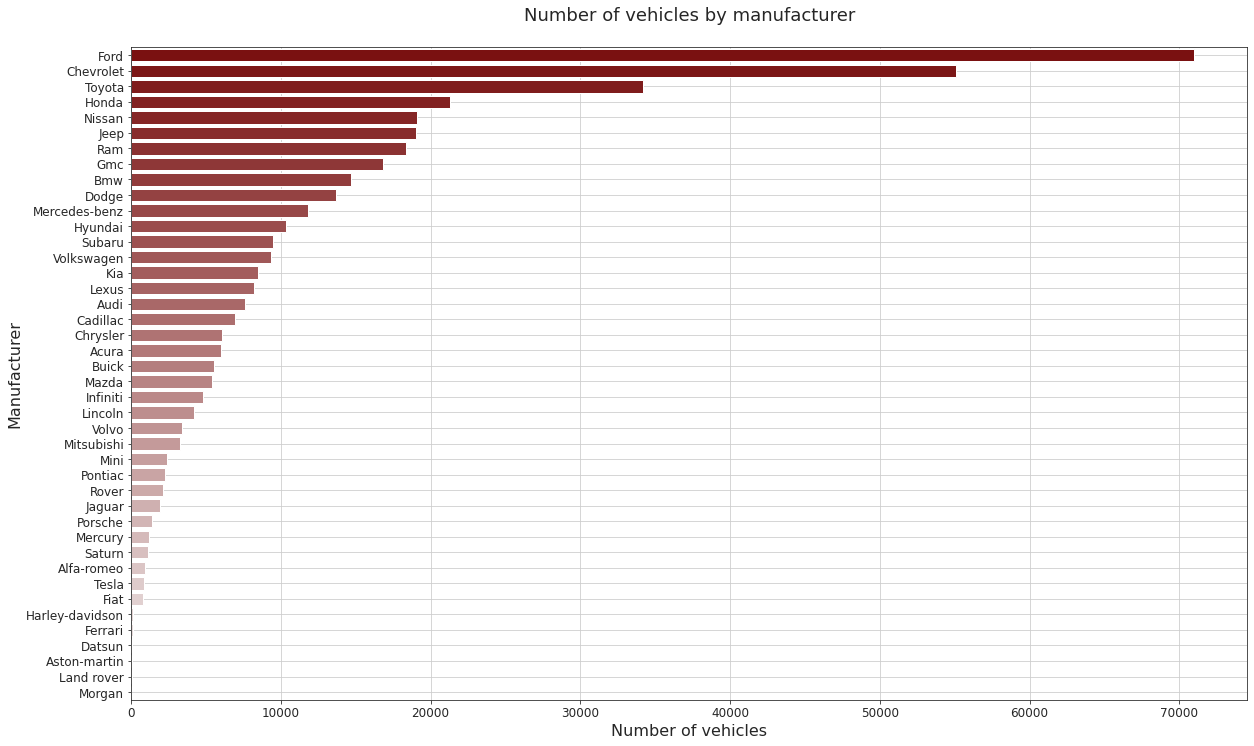

In [12]:
indexes = [i.capitalize() for i in brand_count.index]

# Plot
plt.figure(figsize=(20, 12))

sns.set_style('ticks')
sns.barplot(x=brand_count.values, y=indexes, palette=sns.light_palette('darkred', reverse=True, n_colors=len(brand_count)))
plt.grid(True)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title('Number of vehicles by manufacturer\n', fontdict={'fontsize': 18})
plt.ylabel('Manufacturer', fontdict={'fontsize': 16})
plt.xlabel('Number of vehicles', fontdict={'fontsize': 16})

plt.show()

# Vehicle average price by vehicle type and transmission

In [13]:
prices_df = df.groupby(['type', 'transmission'])['price'].median()
prices_df = prices_df.reset_index()
prices_df

,type,transmission,price
0,SUV,automatic,11999.0
1,SUV,manual,11537.0
2,SUV,other,29590.0
3,bus,automatic,12000.0
4,bus,manual,4000.0
5,bus,other,6900.0
6,convertible,automatic,13995.0
7,convertible,manual,12978.5
8,convertible,other,26990.0
9,coupe,automatic,11900.0


In [14]:
# Preparing DataFrame for plotting
prices_df = prices_df.rename(columns={'type': 'Type', 'transmission': 'Transmission', 'price': 'Price'})
prices_df['Type'] = prices_df['Type'].str.capitalize()
prices_df['Transmission'] = prices_df['Transmission'].str.capitalize()
prices_df

,Type,Transmission,Price
0,Suv,Automatic,11999.0
1,Suv,Manual,11537.0
2,Suv,Other,29590.0
3,Bus,Automatic,12000.0
4,Bus,Manual,4000.0
5,Bus,Other,6900.0
6,Convertible,Automatic,13995.0
7,Convertible,Manual,12978.5
8,Convertible,Other,26990.0
9,Coupe,Automatic,11900.0


<Figure size 1296x864 with 0 Axes>

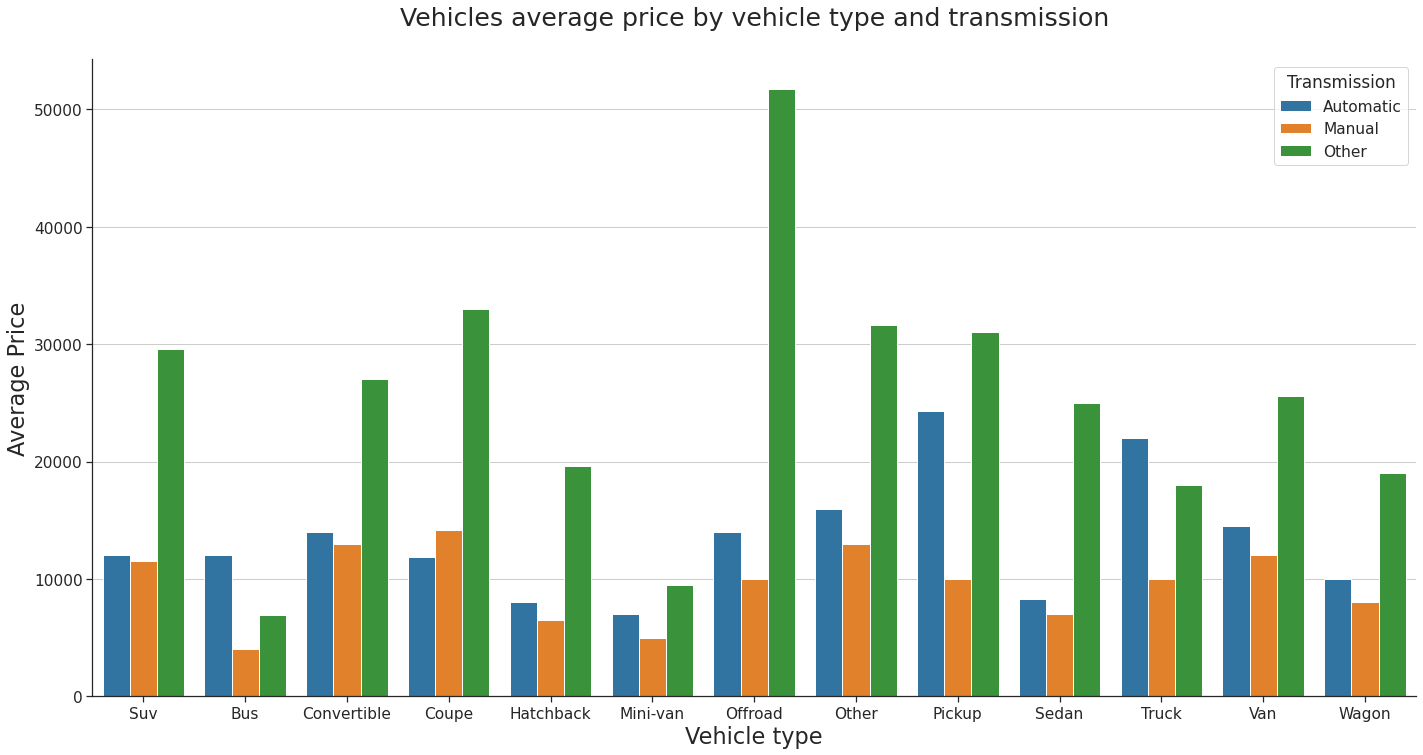

In [15]:
# Plot
plt.figure(figsize=(18, 12))


sns.set(font_scale=1.4)
sns.set_style('ticks')

sns.catplot(data=prices_df, kind='bar', x='Type', y='Price', hue='Transmission',
    palette=sns.color_palette('tab10'),
    height=10, aspect=2,
    legend_out=False)

plt.grid(True, axis='y')
plt.title('Vehicles average price by vehicle type and transmission\n', fontdict={'fontsize': 25.2})
plt.xlabel('Vehicle type', fontdict={'fontsize': 22.4})
plt.ylabel('Average Price', fontdict={'fontsize': 22.4})

#plt.show()
plt.savefig('5.svg', dpi=300, bbox_inches='tight')

# Average price by manufacturer and vehicle type

In [16]:
prices_df = df.groupby(['manufacturer', 'type'])['price'].median()
prices_df

manufacturer  type     
acura         SUV          21590.0
              coupe         4500.0
              hatchback     4750.0
              mini-van      3999.0
              other        37590.0
                            ...   
volvo         offroad       4995.0
              other        31990.0
              sedan        18990.0
              truck        20500.0
              wagon         8000.0
Name: price, Length: 396, dtype: float64

In [17]:
prices_df = prices_df.reset_index()
prices_df

,manufacturer,type,price
0,acura,SUV,21590.0
1,acura,coupe,4500.0
2,acura,hatchback,4750.0
3,acura,mini-van,3999.0
4,acura,other,37590.0
...,...,...,...
391,volvo,offroad,4995.0
392,volvo,other,31990.0
393,volvo,sedan,18990.0
394,volvo,truck,20500.0


In [18]:
# Prepare data for plotting

prices_df = prices_df.rename(columns={'manufacturer': 'Manufacturer', 'type': 'Type', 'price': 'Price'})
prices_df['Manufacturer'] = prices_df['Manufacturer'].str.capitalize()
prices_df['Type'] = prices_df['Type'].str.capitalize()
prices_df = prices_df.pivot('Manufacturer', 'Type', 'Price')
prices_df.fillna(value=0, inplace=True)
prices_df.head(5)

Type,Bus,Convertible,Coupe,Hatchback,Mini-van,Offroad,Other,Pickup,Sedan,Suv,Truck,Van,Wagon
Manufacturer,,,,,,,,,,,,,
Acura,0.0,0.0,4500.0,4750.0,3999.0,0.0,37590.0,0.0,15590.0,21590.0,10900.0,7600.0,15590.0
Alfa-romeo,0.0,8750.0,21900.0,29990.0,0.0,0.0,30850.0,0.0,28620.0,28163.0,0.0,0.0,27995.0
Aston-martin,0.0,42747.5,1947.0,0.0,0.0,0.0,0.0,0.0,74991.0,0.0,0.0,0.0,0.0
Audi,0.0,15000.0,29990.0,21831.0,0.0,0.0,31990.0,17995.0,23999.0,20495.0,14995.0,0.0,26590.0
Bmw,18495.0,15800.0,21116.0,18900.0,0.0,0.0,30590.0,0.0,14999.0,15998.0,7625.0,384.0,17993.0


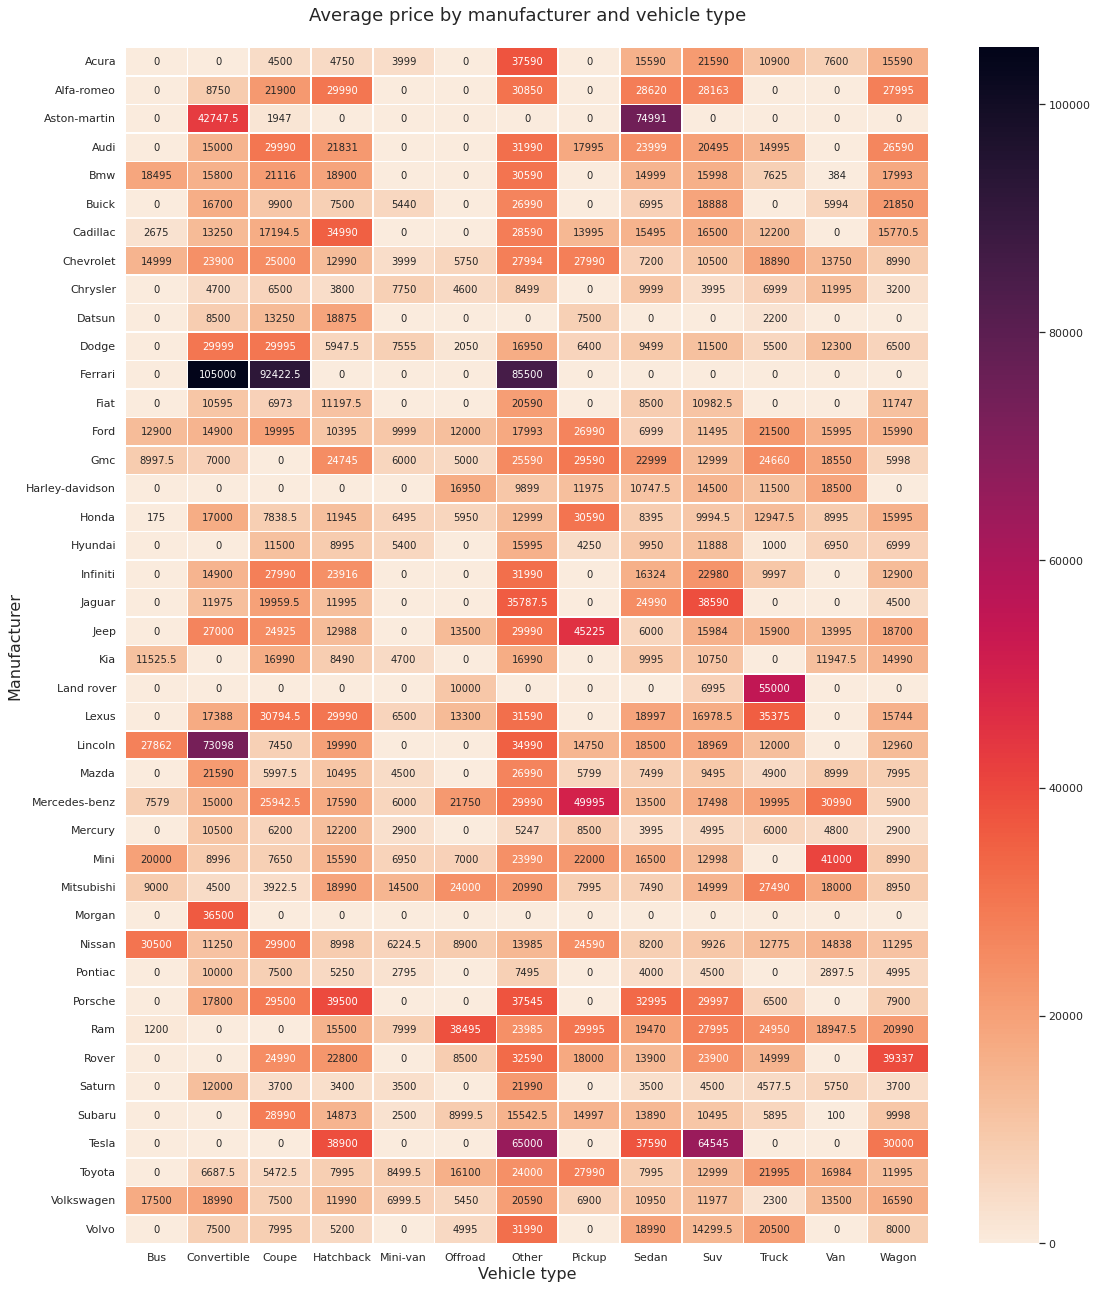

In [19]:
# Plot

plt.figure(figsize=(18, 22))

sns.set(font_scale=1)

sns.heatmap(data=prices_df, linewidths=0.5,
    annot=True, fmt='g', annot_kws={"fontsize":10},
    cmap=sns.color_palette("rocket_r", as_cmap=True))

plt.title('Average price by manufacturer and vehicle type\n', fontdict={'fontsize': 18})
plt.xlabel('Vehicle type', fontdict={'fontsize': 16})
plt.ylabel('Manufacturer', fontdict={'fontsize': 16})

plt.show()